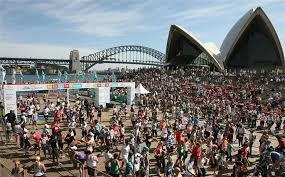

In [11]:
from IPython.display import Image
Image(filename='marathon_sydney.jpg') 

# Hardloopschema

Vul hieronder de parameters in en druk op de knop ververs.
<br>
- **Start:** Maandag waarop het hardloopschema begint.
<br>
- **Wedstrijd:** Datum waarom de wedstrijd gaat plaatsvinden.
<br>
- **Afstand:** Afstand die je gaat lopen.
<br>
- **Training:** Op welke dagen kun/wil je trainen.
<br>
- **Huidige KM:** Hoeveel kilometer loop je per week?
<br>
- **Groei %:** Hiermee kun je instellen met hoeveel % het week kilometrage moet toenemen. Na elke drie weken is er een week
<br>
waarin het aantal kilometers minder is zodat je kan herstellen.
<br>
- **Layout:** In welke kleur wil je het hardloopschema hebben? 

In [2]:
import pandas as pd
import datetime as datetime
import ipywidgets as widgets
from ipywidgets import Button, Layout,interact,interactive, Box, VBox

In [3]:
from datetime import date
Options=[]
Vandaag = date.today()
import datetime as datetime
Maandag = Vandaag + datetime.timedelta(days=-Vandaag.weekday(), weeks=1)
for i in [1,2,3,4,5]:
    Optie=str(Maandag.strftime("%d/%m/%Y"))
    Options.append((Optie,Maandag))
    Maandag=Maandag+datetime.timedelta(days=7)
    
Start=widgets.Dropdown(
        options=Options,
        description='Start',
        disabled=False
    )
display(Start)

from datetime import datetime
Wedstrijd=widgets.DatePicker(
    description='Wedstrijd:',
    value=datetime.strptime('12/06/2022', '%d/%m/%Y').date(),
    disabled=False
)
display(Wedstrijd)

options=['5km','10km','Halve marathon','Marathon']
Afstand=widgets.Dropdown(
        options=options,
        value='10km',
        description='Afstand:',
        disabled=False
    )
display(Afstand)

options=['Ma', 'Di', 'Wo','Do','Vr','Za','Zo']
TrainingDagenWidget=widgets.SelectMultiple(
    options=options,
    value=['Ma', 'Wo','Vr','Za','Zo'],
    description='Training:',
    rows=len(options),
    disabled=False
)
display(TrainingDagenWidget)

HuidigeKM_widget=widgets.IntSlider(
    value=50,
    min=20,
    max=100,
    step=1,
    description='Huidige KM:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(HuidigeKM_widget)

Groei=widgets.FloatSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Groei %:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(Groei)

Layout=widgets.Dropdown(
        options=['Grijs','Blauw'],
        value='Grijs',
        description='Layout:',
        disabled=False
    )
display(Layout)

Dropdown(description='Start', options=(('30/05/2022', datetime.date(2022, 5, 30)), ('06/06/2022', datetime.dat…

DatePicker(value=datetime.date(2022, 6, 12), description='Wedstrijd:')

Dropdown(description='Afstand:', index=1, options=('5km', '10km', 'Halve marathon', 'Marathon'), value='10km')

SelectMultiple(description='Training:', index=(0, 2, 4, 5, 6), options=('Ma', 'Di', 'Wo', 'Do', 'Vr', 'Za', 'Z…

IntSlider(value=50, continuous_update=False, description='Huidige KM:', min=20)

FloatSlider(value=7.0, continuous_update=False, description='Groei %:', max=10.0, readout_format='d', step=1.0…

Dropdown(description='Layout:', options=('Grijs', 'Blauw'), value='Grijs')

In [4]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Ververs")
button.on_click(run_all)
display(button)

Button(description='Ververs', style=ButtonStyle())

In [5]:
data={'TrainingType':['L','E','T','I','R']
      ,'Omschrijving':['Lange duurloop','Easy running','Tempoloop','Interval','Repetitions']
     ,'Tempo':['5:19','4:43','4:04','3:44','3:30']
     ,'Hartslag':['120-135','125-140','145-160','158-166','n.v.t.']
     ,'MaxPerc':['0.25','1.0','0.10','0.08','0.05']}
df=pd.DataFrame(data=data)
df.MaxPerc=df.MaxPerc.astype(float)
df[['TrainingType','Omschrijving','Tempo','Hartslag']].style.hide_index()

TrainingType,Omschrijving,Tempo,Hartslag
L,Lange duurloop,5:19,120-135
E,Easy running,4:43,125-140
T,Tempoloop,4:04,145-160
I,Interval,3:44,158-166
R,Repetitions,3:30,n.v.t.


In [6]:
import datetime as datetime
Wedstrijd_date=Wedstrijd.value
n_dagen=Wedstrijd_date-Start.value
n_weken=int(round(n_dagen.days/7.0,0))
n=n_weken
Datum=['']*n
Week=[]
Rust=['Rust']*n
TotaalKM=['0']*n
for i in range(1, n+1):
    Week.append(str(i).zfill(1))

Groei_float=Groei.value/100.0
Groei_list=[]
j=0
for i in Week:
    if j==3:
        Groei_list.append(1-Groei_float)
        j=0
    else:
        Groei_list.append(1+Groei_float)
        j=j+1

data={
    'Week':Week
    ,'Groei':Groei_list
}
df_groei=pd.DataFrame(data=data)
df_groei.at[n-1,'Groei']=0.5   


data2={
    'Datum':Datum
    ,'Week':Week
    ,'Ma':Rust
      ,'Di':Rust
     ,'Wo':Rust
     ,'Do':Rust
     ,'Vr':Rust
     ,'Za':Rust
     ,'Zo':Rust
       ,'TotaalKM':TotaalKM}
df2=pd.DataFrame(data=data2)

In [7]:
Dagen_vd_week=['Ma', 'Di', 'Wo','Do','Vr','Za','Zo']
TrainingDagen=TrainingDagenWidget.value
n_TrainingDagen=len(TrainingDagen)
QualityOneven=[]
QualityEven=[]
for i in range(7):
    if TrainingDagen[0]==Dagen_vd_week[i]:
        QualityOneven.append(TrainingDagen[0])
        QualityEven.append(TrainingDagen[0])
for k in range(1,n_TrainingDagen):
    for i in range(7):
        if TrainingDagen[k]==Dagen_vd_week[i] and QualityOneven[len(QualityOneven)-1]!=Dagen_vd_week[i-1]: 
            if TrainingDagen[0]!='Ma' or TrainingDagen[k]!='Zo':
                QualityOneven.append(TrainingDagen[k])
                QualityEven.append(TrainingDagen[k])
if (Afstand.value=='Halve marathon' or Afstand.value=='Marathon') and len(QualityOneven)==4:
    TrainingTypeOneven=['T','I','T','L']
    TrainingTypeEven=['T','I','T','L']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if (Afstand.value=='Halve marathon' or Afstand.value=='Marathon')  and len(QualityOneven)==3:
    TrainingTypeOneven=['T','I','L']
    TrainingTypeEven=['T','I','L']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if Afstand.value=='10km' and len(QualityOneven)==3:
    TrainingTypeOneven=['T','I','R']
    TrainingTypeEven=['T','I','L']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if Afstand.value=='10km' and len(QualityOneven)==2:
    TrainingTypeOneven=['T','I']
    TrainingTypeEven=['T','R']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if Afstand.value=='5km' and len(QualityOneven)==2:
    TrainingTypeOneven=['T','R']
    TrainingTypeEven=['I','T']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if Afstand.value=='5km' and len(QualityOneven)==3:
    TrainingTypeOneven=['T','I','R']
    TrainingTypeEven=['T','I','R']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]
if Afstand.value=='5km' and len(QualityOneven)==4:
    TrainingTypeOneven=['T','I','R','T']
    TrainingTypeEven=['I','R','T','I']
    QualityLaatste=QualityEven[0:2]
    TrainingTypeLaatste=TrainingTypeEven[0:2]

In [8]:
StartMaandag = Start.value
Week=df_groei.Week
m=0
HuidigeKM=float(HuidigeKM_widget.value)
for w in Week:
    num=int(w)
    if num==n_weken:
        TrainingType=TrainingTypeLaatste
        Quality=QualityLaatste
    elif num % 2 != 0:
        TrainingType=TrainingTypeOneven
        Quality=QualityOneven
    else:
        TrainingType=TrainingTypeEven
        Quality=QualityEven
    Groei_float=float(df_groei[df_groei.Week==Week[m]].Groei.values[0])
    HuidigeKM=HuidigeKM*Groei_float
    df['MaxKM']=HuidigeKM*df.MaxPerc
    AantalKM_L=int(round(df[df['TrainingType']=='L'].MaxKM))*TrainingType.count('L')
    AantalKM_per_TrainingDay=(HuidigeKM-AantalKM_L)/(n_TrainingDagen-TrainingType.count('L'))
    df['MaxKM']=df['MaxKM'].round(1)
    TotaalKM=0
    n=0
    KM=0
    for i in Quality:
        TrainingTypeHuidig=TrainingType[n]
        TrainingTypeHuidig=TrainingTypeHuidig[0]
        MaxKMHuidig=df[df['TrainingType']==TrainingType[n]].MaxKM
        if num==n_weken:
            MaxKMHuidig=MaxKMHuidig/2.0
        if TrainingTypeHuidig=='L':
            AantalInt=int(round(MaxKMHuidig))
            Aantal=str(AantalInt)
            Text =  Aantal +TrainingTypeHuidig
            KM=KM+AantalInt
        elif TrainingTypeHuidig=='T':
            AantalWarmUp=2
            AantalInt=int(round(MaxKMHuidig/1.6))
            Aantal=str(AantalInt)
            AantalKM=4+AantalInt*1.6
            if AantalKM < AantalKM_per_TrainingDay:
                Aantal_E=int(round(AantalKM_per_TrainingDay-AantalKM))
                AantalKM=4+AantalInt*1.6+Aantal_E
                AantalWarmUp=2+Aantal_E
            else:
                AantalKM=4+AantalInt*1.6
            Text = str(AantalWarmUp)+"E + "+ Aantal +"x1,6 T 1min rust"+" + 2E ("+str(int(round(AantalKM)))+"KM)"
            KM=KM+AantalKM
        elif TrainingTypeHuidig=='R': 
            AantalWarmUp=2
            AantalInt=int(round(MaxKMHuidig/0.4))
            Aantal=str(AantalInt)
            AantalKM=4+AantalInt*0.4
            if AantalKM < AantalKM_per_TrainingDay:
                Aantal_E=int(round(AantalKM_per_TrainingDay-AantalKM))
                AantalKM=4+AantalInt*0.4+Aantal_E
                AantalWarmUp=2+Aantal_E
            else:
                AantalKM=4+AantalInt*0.4
            Text = str(AantalWarmUp)+"E + "+ Aantal +"x400m R 400m rust"+" + 2E ("+str(int(round(AantalKM)))+"KM)"
            KM=KM+AantalKM
        else:
            AantalInt=int(round(MaxKMHuidig/1.0))
            Aantal=str(AantalInt)
            AantalKM=4+AantalInt
            if AantalKM < AantalKM_per_TrainingDay:
                Aantal_E=int(round(AantalKM_per_TrainingDay-AantalKM))
                AantalKM=4+AantalInt+Aantal_E
                AantalWarmUp=2+Aantal_E
            else:
                AantalKM=4+AantalInt
            Text = str(AantalWarmUp)+"E + "+ Aantal +"x1 I 3min rust"+ " + 2E ("+str(int(round(AantalKM)))+"KM)"
            KM=KM+AantalKM
        df2.at[m,Quality[n]]=Text
        n=n+1
    TotaalKM=TotaalKM+KM
    Toewijzen=HuidigeKM-KM
    E_dagen=set(TrainingDagen)-set(Quality)
    E_dagen=list(E_dagen)
    Aantal_E_dagen=len(E_dagen)
    KM_E=0
    if Aantal_E_dagen>0:
        Toewijzen=Toewijzen/Aantal_E_dagen
        Toewijzen=int(Toewijzen)
        l=0
        for i in E_dagen:
            KM_E=KM_E+Toewijzen
            Text = str(Toewijzen)+"E"
            df2.at[m,E_dagen[l]]=Text
            l=l+1
    TotaalKM=TotaalKM+KM_E
    df2.at[m,'TotaalKM']=round(TotaalKM)
    df2.at[m,'Datum']=StartMaandag.strftime('%Y-%m-%d')
    StartMaandag=StartMaandag+datetime.timedelta(days=7)
    m=m+1
if Wedstrijd_date.weekday()+1==7:
    df2.at[n_weken-1,'Za']=df2.at[n_weken-1,'Za']+' + 4x100m sprint'
    df2.at[n_weken-1,'Zo']='Wedstrijd'

In [9]:
s1=df2.style.set_properties(**{'background-color': 'blue',
                               'border': '1.3px black',
                          'color': 'black',
                           'text-align': 'center'})
s2 = s1.set_table_styles([
                            {
                                "selector":"thead",
                                "props": [("background-color", "dodgerblue"), ("color", "white"),
                                          ("border", "1px white"),
                                          ("font-size", "2rem"), ("font-style", "italic")
                                         ]
                            },
                            {
                                "selector":"th.row_heading",
                                "props": [("background-color", "blue"), ("color", "bold black"),
                                          ("border", "1px white"),
                                          ("font-size", "2rem"), ("font-style", "italic")
                                         ]
                            },
                            {
                                "selector":"th.column_heading",
                                "props": [('text-align', 'center')
                                         ]
                            },
                        ])

In [10]:
if Layout.value=='Grijs':
    display(df2.style.hide_index())
if Layout.value=='Blauw':
    display(s2.hide_index())

Datum,Week,Ma,Di,Wo,Do,Vr,Za,Zo,TotaalKM
2022-05-30,1,"4E + 3x1,6 T 1min rust + 2E (11KM)",Rust,5E + 4x1 I 3min rust + 2E (11KM),Rust,6E + 7x400m R 400m rust + 2E (11KM),10E,10E,53
2022-06-06,2,"2E + 1x1,6 T 1min rust + 2E (6KM)",Rust,2E + 1x1 I 3min rust + 2E (5KM),Rust,5E,5E + 4x100m sprint,Wedstrijd,26
